
# <p style="text-align: center;">MIS 382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wednesday, October 25th, submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">Daxi Cheng(dc43342), Jianjie Zheng(jz23373) </p>
Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Gradient Descent (5+8+2=15pts)

In this question you will implement vanilla SGD and an adaptive gradient update technique called Adagrad. In addition, you will also implement ridge regularization. 

1. Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1*x_1 + w_2*x_1*x_2 + w_3*x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'SGD' or 'adagrad' (Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 10 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch count (10 epochs) for the best 2 combinations of learning_rate and regularization for both SGD and Adagrad. ie you should have 2 plots of MSE and parameter updates for SGD and adagrad each. Report the MSE at the end of 10 epochs for all 4 combinations.
3. Based on the experiments, answer the following:

1. Which of the 2 techniqes allows for larger initial setting of the learning_rate? Why?
2. What would a drawback of adagrad be? How could this be fixed? (Hint: Adadelta)

# Notes on Adagrad
Adagrad (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. A cache is maintained that holds the sum of squares of all gradients upto the current update. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = cache + (gradients^2)
2. weights = weights - ((learning_rate)/sqrt(cache+1e-6))*gradients

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

## Answer

<font size=4.5>
$ Loss \ function \ L_{i}= (y_{i}-t_{i})^2$<br>
Where $y_{i}= w_0 + w_1*x_{i1} + w_2*x_{i1}*x_{i2} + w_3*x_{i2}$<br><br>
Let $E_{i}=y_{i}-t_{i}$<br><br>
$\cfrac{\partial L_{i}}{\partial w_{0}} = \cfrac{\partial L_{i}}{\partial E_{i}}*\cfrac{\partial E_{i}}{\partial w_{0}}=2*(y_{i}-t_{i})$<br><br>
$\cfrac{\partial L_{i}}{\partial w_{1}} = \cfrac{\partial L_{i}}{\partial E_{i}}*\cfrac{\partial E_{i}}{\partial w_{1}}=2*(y_{i}-t_{i})*x_{i1}$<br><br>
$\cfrac{\partial L_{i}}{\partial w_{2}} = \cfrac{\partial L_{i}}{\partial E_{i}}*\cfrac{\partial E_{i}}{\partial w_{2}}=2*(y_{i}-t_{i})*x_{i1}x_{i2}$<br><br>
$\cfrac{\partial L_{i}}{\partial w_{3}} = \cfrac{\partial L_{i}}{\partial E_{i}}*\cfrac{\partial E_{i}}{\partial w_{3}}=2*(y_{i}-t_{i})*x_{i2}$<br><br>
We update the coefficients by:
$$ w_j = w_j - \eta * \frac{\partial L_{i}}{\partial w_{j}} $$
$\eta$ is the learning rate <br>


In [1]:
import pandas as pd
from pandas import Series, DataFrame
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.utils import shuffle

class SGD:
    '''This is a class to conduct the stochastic gradient descend algorithm'''
    def __init__(self, eta,reg, epoches):
        '''initialize the class with the specific learning rate and number of epoches the user provide'''
        self.eta = eta
        self.reg = reg
        self.epoches = epoches
    
    def fit(self, X, y,update_rule):
        '''fit the model through given numnber of epoch. '''
        # Initialize coefficients with all zeros
        weights = np.array([0]*4)
        w0 = weights[0]
        w1 = weights[1]
        w2 = weights[2]
        w3 = weights[3]
        cache0=0
        cache1=0
        cache2=0
        cache3=0
        # Iterate through data set the number of times specified in input
        for epoch in range(self.epoches):             
            # Update all the coefficients according to what we wrote in part 1
            for i in range(len(X)):
                current_x1 = X[i][0]
                current_x2 = X[i][1]
                current_t = y[i]
                eta = self.eta
                current_y = w0 + (w1*current_x1) + (w2*current_x1*current_x2) + (w3*current_x2)
                gradients0=2*(current_y - current_t)+2*self.reg*w0
                gradients1=2*(current_y - current_t)*current_x1+2*self.reg*w1
                gradients2=2*(current_y - current_t)*(current_x1*current_x2)+2*self.reg*w2
                gradients3=2*(current_y - current_t)*current_x2+2*self.reg*w3
                
                if update_rule=='adagrad':
                    cache0 = cache0 + (gradients0**2)
                    cache1 = cache1 + (gradients1**2)
                    cache2 = cache2 + (gradients2**2)
                    cache3 = cache3 + (gradients3**2)
                    updatecoef0=(eta)/math.sqrt(cache0+1e-6)
                    updatecoef1=(eta)/math.sqrt(cache1+1e-6)
                    updatecoef2=(eta)/math.sqrt(cache2+1e-6)
                    updatecoef3=(eta)/math.sqrt(cache3+1e-6)
                elif update_rule=='SGD':
                    updatecoef0=eta
                    updatecoef1=eta
                    updatecoef2=eta
                    updatecoef3=eta
                w0 = w0 -updatecoef0*gradients0
                w1 = w1 -updatecoef1*gradients1
                w2 = w2 -updatecoef2*gradients2
                w3 = w3 -updatecoef3*gradients3
                weights = [w0, w1, w2, w3]
        self.weights = weights

    def predict(self, X):
        '''Predict the value using the fitted model. 
        Notice: If try to predict without fitting, result will be all weight being zeros.'''
        # Get the weights from object attribute
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        w3 = self.weights[3]
        y_pred = []
        # Predict for each data in X
        for data in X:
            current_x1 = float(data[0])
            current_x2 = float(data[1])
            current_y = w0 + (w1*current_x1) + (w2*current_x1*current_x2) + (w3*current_x2)
            # Append the prediction to the pred list
            y_pred.append(current_y)
        #record this prediction to y_pred
        self.y_pred = y_pred
        return y_pred

In [3]:
# Read the data and transform to the X and y we want
data_q1 = pd.read_csv('samples.csv')[['x_1', 'x_2', 'y']]
X, y = np.array(data_q1[['x_1', 'x_2']]), np.array(data_q1['y'])

from sklearn.metrics import mean_squared_error as MSE
# Test different parameters

learning_rates = [0.0001, 0.001, 0.01,0.1,1,10,100]
regs = [0,10,100]
# Create MSE list for different learning rate eta

# Use this function to try different models
def trymodel(Eta, Lambda,method):
    model = SGD(Eta, Lambda,10) 
    model.fit(X, y,method)
    prediction = model.predict(X)
    try:
        mse=MSE(y,prediction)
        return mse
    except:
        return 'error '
SGDMSElist=[]
adagradlist=[]
for Eta in learning_rates:
    for Lambda in regs:
        message=(trymodel(Eta,Lambda,'SGD'),Eta,Lambda)
        SGDMSElist.append(message)
for Eta in learning_rates:
    for Lambda in regs:
        message=(trymodel(Eta,Lambda,'adagrad'),Eta,Lambda)
        adagradlist.append(message)

In [4]:
print 'best SGD combination',sorted(SGDMSElist,key=lambda x:x[0])[:2]
print 'best adagrad combination', sorted(adagradlist,key=lambda x:x[0])[:2]

best SGD combination [(2.7278520489864127e-15, 0.001, 0), (0.12525863182821118, 0.0001, 0)]
best adagrad combination [(3.8087463348462628e-21, 1, 0), (1.0581535175457021e-20, 10, 0)]


## So we have the best coefficients for SGD and adagrad as below:
SGD: learning rate=0.001, regularization constants=0 and learning rate=0.0001, regularization constants=0<br>
adagrad: learning rate=1, regularization constants=0 and learning rate=10, regularization constants=0

In [5]:
def plotMseWeights(Eta,Lambda,method):
    figure(figsize=(10,4))
    Mse=[]
    Weight=[]
    num_of_epoch=range(1,11)
    for num_epoch in num_of_epoch:
        model = SGD(Eta, Lambda,num_epoch) 
        model.fit(X, y,method)
        prediction = model.predict(X)
        mse=MSE(y,prediction)
        Mse.append(mse)
        Weight.append(model.weights)
    Weight=np.array(Weight)
    subplot(121)
    plot(num_of_epoch, Mse)
    title1='Eta: '+str(Eta)+' Lambda: '+str(Lambda)+' '+method
    title(title1)
    xlabel('Number of Epoch')
    ylabel('MSE')
    df_weights = DataFrame(Weight)
    df_weights.columns = ['w0', 'w1', 'w2', 'w3']
    subplot(122)
    plot(num_of_epoch, df_weights['w0'])
    plot(num_of_epoch, df_weights['w1'])
    plot(num_of_epoch, df_weights['w2'])
    plot(num_of_epoch, df_weights['w3'])
    xlabel('Number of Epoch')
    ylabel('Weights')
    title(title1)
    legend(loc = 'best')

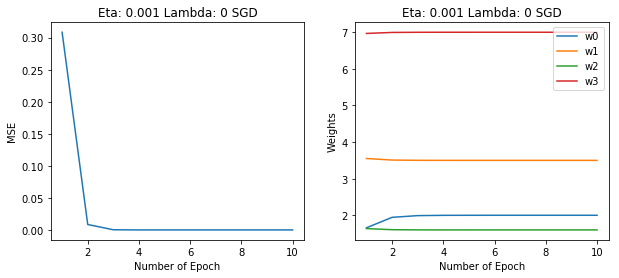

In [6]:
plotMseWeights(0.001,0,'SGD')

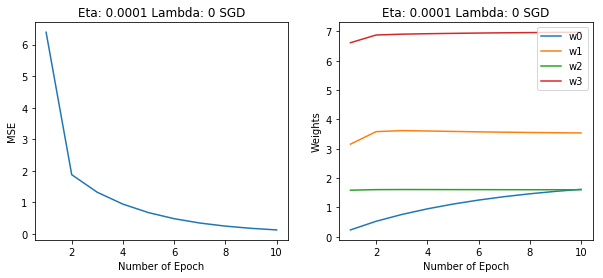

In [7]:
plotMseWeights(0.0001,0,'SGD')

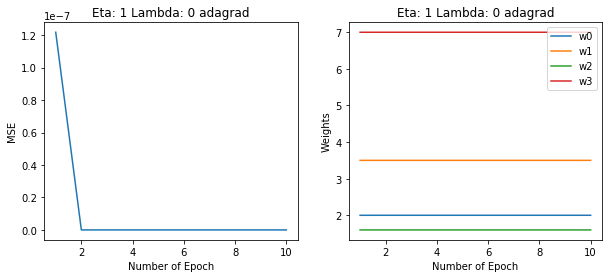

In [8]:
plotMseWeights(1,0,'adagrad')

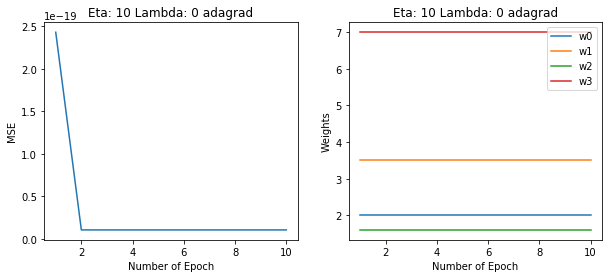

In [9]:
plotMseWeights(10,0,'adagrad')

## Answer to 2 questions
**Q1.**From the analysis above, we can see that adagrad can allow large learning rate. Actually when I was doing this homework, I found that once the learning rate greater than 0.001, vanilla SGD will just explode and can not converge. While adagrad simply tune the learning rate smaller each step, since cache is monotonically increasing, the coefficient of gradient in the weight updating equation (still call it learning rate) is monotonically decreasing. So as we can see from the graph, the weights hardly change after few iterations.

**Q2.**One of the draw back of adagrad is as said above, the weight just update really slow after first few iterations. This monotonically decreasing learning rate makes it really aggressive.<br>
One way to fix this is to use adadelta, just replace the monotonically increasing cache part of the adagrad with the decaying average over past squared gradients. Which is updating by:<br><br>
$$w=w-\cfrac{\eta}{\sqrt{E[g^2]_{t}+\epsilon}}*g_{t}$$

# 2. (6+4=10 pts) Tensor Playground
Visit http://playground.tensorflow.org for this problem

A. From the far right, select "Regression" as the problem type, and select the 2nd of the two data sets ( the right one ).  

   i) What sort of test / training loss do you get if you run it for 200 epochs with the following learning rates: .3, .01 and .003 ?  What if you run it for 1000 epochs with these learning rates?  Leave all other values at their defaults ( test/training ratio 50%, Noise 0, Batch Size 10, using Tanh activation function, and No Regularization )
   
   ii) Keeping learning rate at .3, Activation at Tanh, with all others at their defaults, and running for 200 epochs.  
     What sort of test/train loss can you achieve using only 1 neuron in the first hidden layer.  What about for 2,3 or 8 neurons?  Provide screen shots of output layer and comment on how the different output fits look and compare with one another.

   iii)Now keeping learning rate at .03 with all others at their defaults, and running for 200 epochs.  
       Compare how the activation functions affect the ouput ( ReLU, Sigmoid, Tanh, Linear ). Provide screen shots of output results and comment.


B. Neural Nets can fit anything.  Now reset to the initial defaults, and select "Classification" as the problem type, and from the Data section, select the bottom right "Spriral" data set.  With the idea of trying to minimize training/testing error, provide solutions to the problem for the following 2 scenarios.  i) Using just the first 2 inputs ( as per default ) and ii) Using all 7 of the inputs.  You may use as many layers as you want, whatever activation, however man neurons.  Provide screen shots which show your full network, output and parameters. Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc. 

## ANSWER

In [31]:
from IPython.display import Image

**A.**<br>
i)Result as follow:<br><br>


| Learnig rate | training loss epoch=200 | test loss epoch=200 |training loss epoch=1000 |test lossepoch=1000 | 
| :-----:| :-----: | :------: |:-----:|:-----:|:-----:|
| 0.3| 0.012 | 0.013|0.013|0.012|
| 0.01|0.023|0.024|0.018|0.018|
| 0.003|0.039|0.040|0.021|0.022|

ii)
Use 0.3 learning rate:

| Number of hidden unit | training loss epoch=200 | test loss epoch=200| 
| :-----:| :-----: | :------: |
| 1| 0.044 | 0.046|
| 2|0.034|0.031|
| 3|0.021|0.023|
| 8|0.007|0.007|




### I took the screen shot of both the output layer and the last hidden layer to have a better understanding of what the outputs are formed.

In [33]:
print 'Result with 1 hidden unit:'
Image(filename='ii1.png',width=600,height=800)

Result with 1 hidden unit:


Result with 2 hidden unit:


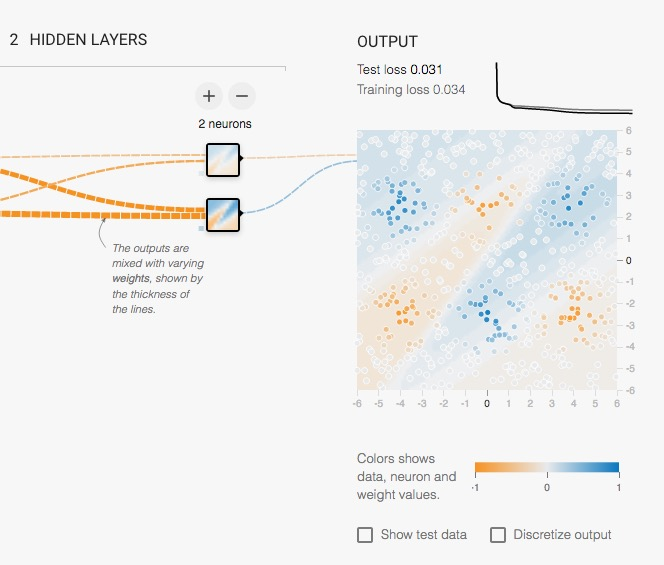

In [35]:
print 'Result with 2 hidden unit:'
Image(filename='ii2.png',width=600,height=800)

Result with 3 hidden unit:


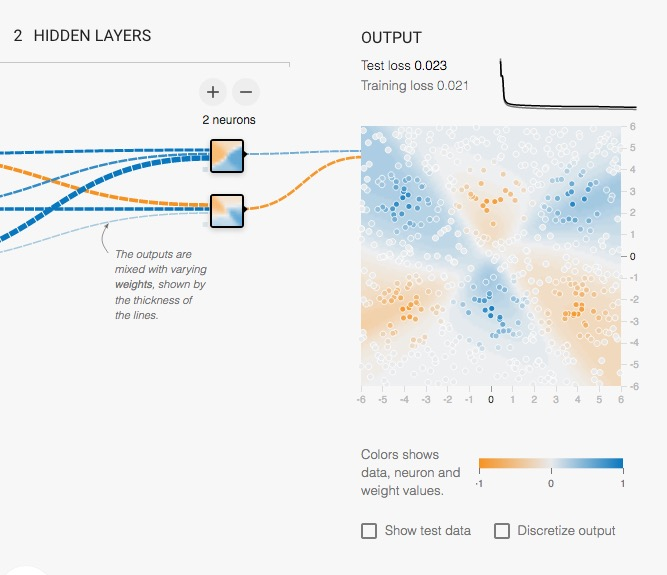

In [36]:
print 'Result with 3 hidden unit:'
Image(filename='ii3.png',width=600,height=800)

Result with 8 hidden unit:


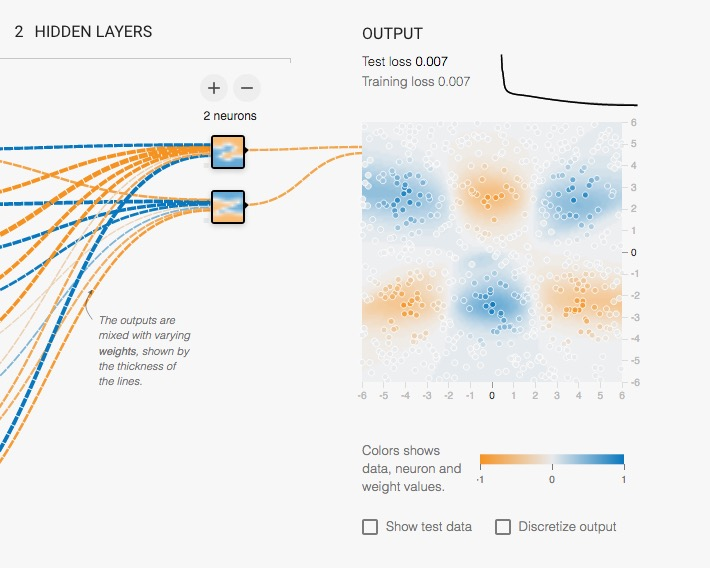

In [37]:
print 'Result with 8 hidden unit:'
Image(filename='ii8.png',width=600,height=800)


We can see from these graphs that as the number of hidden unit growth, the output layer can have better fit for that given dataset. The pattern of that output layer graph just getting more and more complex as the number of hidder unit goes up. The boundary of these two colors just be more and more none linear shape. Since each neuron is actually both linear transform and also bend the space as the activation function do a space transform.
<br><br>
iii)
Use 0.03 learning rate, 4 hidden units by default:

| Type of activation function| training loss epoch=200 | test loss epoch=200| 
| :-----:| :-----: | :------: |
| ReLu| 0.025 | 0.029|
| Sigmoid|0.038|0.043|
| Tanh|0.019|0.022|
| Linear|0.038|0.043|

In [39]:
print 'Result with ReLu:'
Image(filename='iiiRelu.png',width=500,height=300)

Result with ReLu:


Result with Sigmoid:


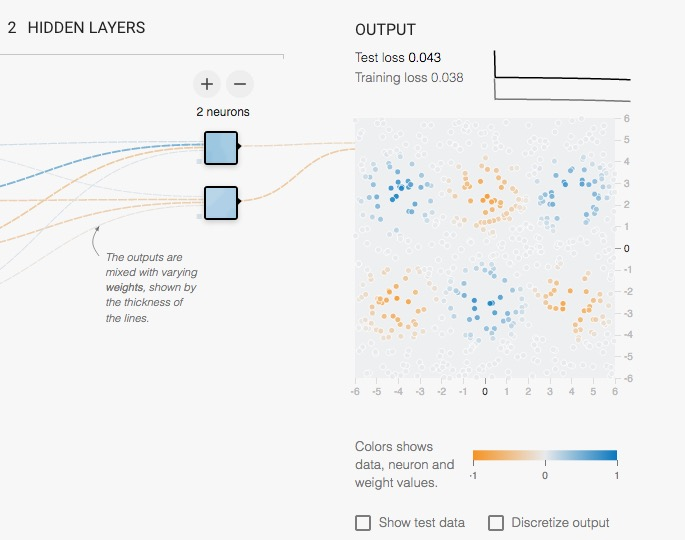

In [40]:
print 'Result with Sigmoid:'
Image(filename='iiiSigmoid.png',width=500,height=300)

Result with Tanh:


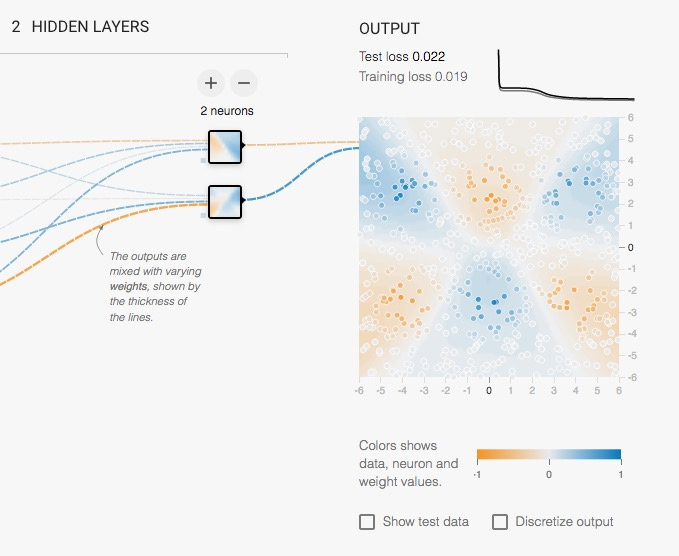

In [41]:
print 'Result with Tanh:'
Image(filename='iiiTanh.png',width=500,height=300)

Result with Linear:


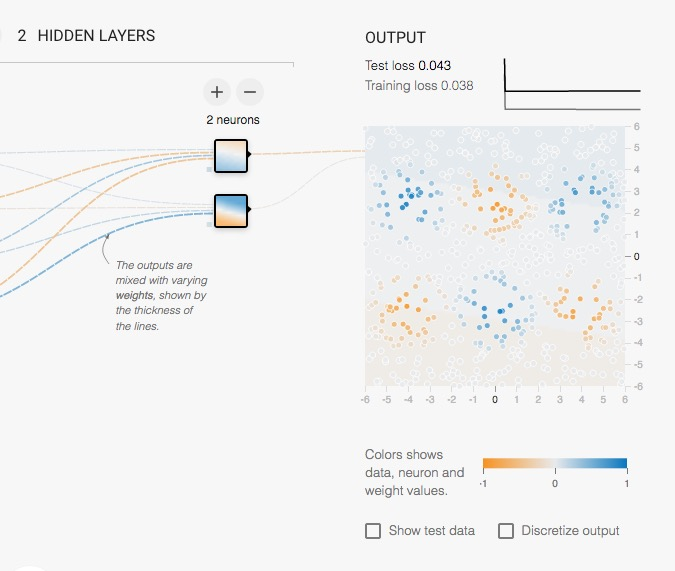

In [42]:
print 'Result with Linear:'
Image(filename='iiiLinear.png',width=500,height=300)


We can see that tanh have the best result and the sigmoid and linear are just slower in the process of loss decreasing. Since sigmoid actually have a rather smaller derivative when the input of sigmoid function is far from zero and linear is expressed in a linear form so it does not fit the non-linear situation and converge really slow.
<br><br>
**B.**<br>

With 2 input, the best result I got is:


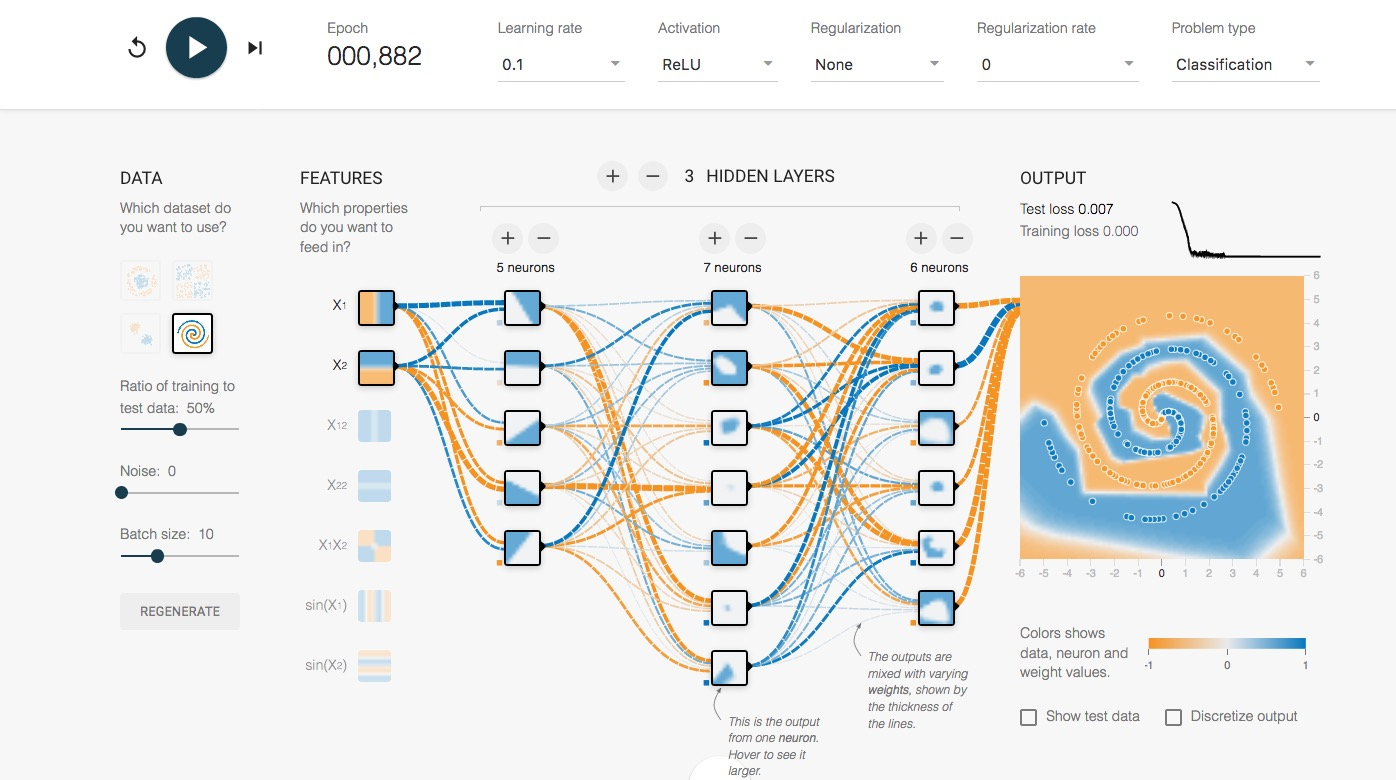

In [43]:
print 'With 2 input, the best result I got is:'
Image(filename='Bbest2.png',width=1000,height=600)

With  as 0.1 learning rate, Relu activation function, 3 hidden layers and 5,7,6 number of units in each layer. With over 800 iterations, I got a training loss of 0.007 and test loss of 0.000.<br>
In this process, I found that though with more complex neural network(more hidden layer and more units in each layer) we can generate more complex version of classification boundaries, the network is really hard to converge also. They are more easy to fluctuate a lot. And same as we got in part A, taking Relu and Tanh as activation function settings are easy to converge and also with a good stability. If we set learning rate too large, sometimes the network's loss just keep fluctuatiing and doesn't converge. And if we set the network too simple with only few hidden units, the total loss would be large and stop at a high loss level. <br><br>
<br>

With all 7 imput, the best result I got is:


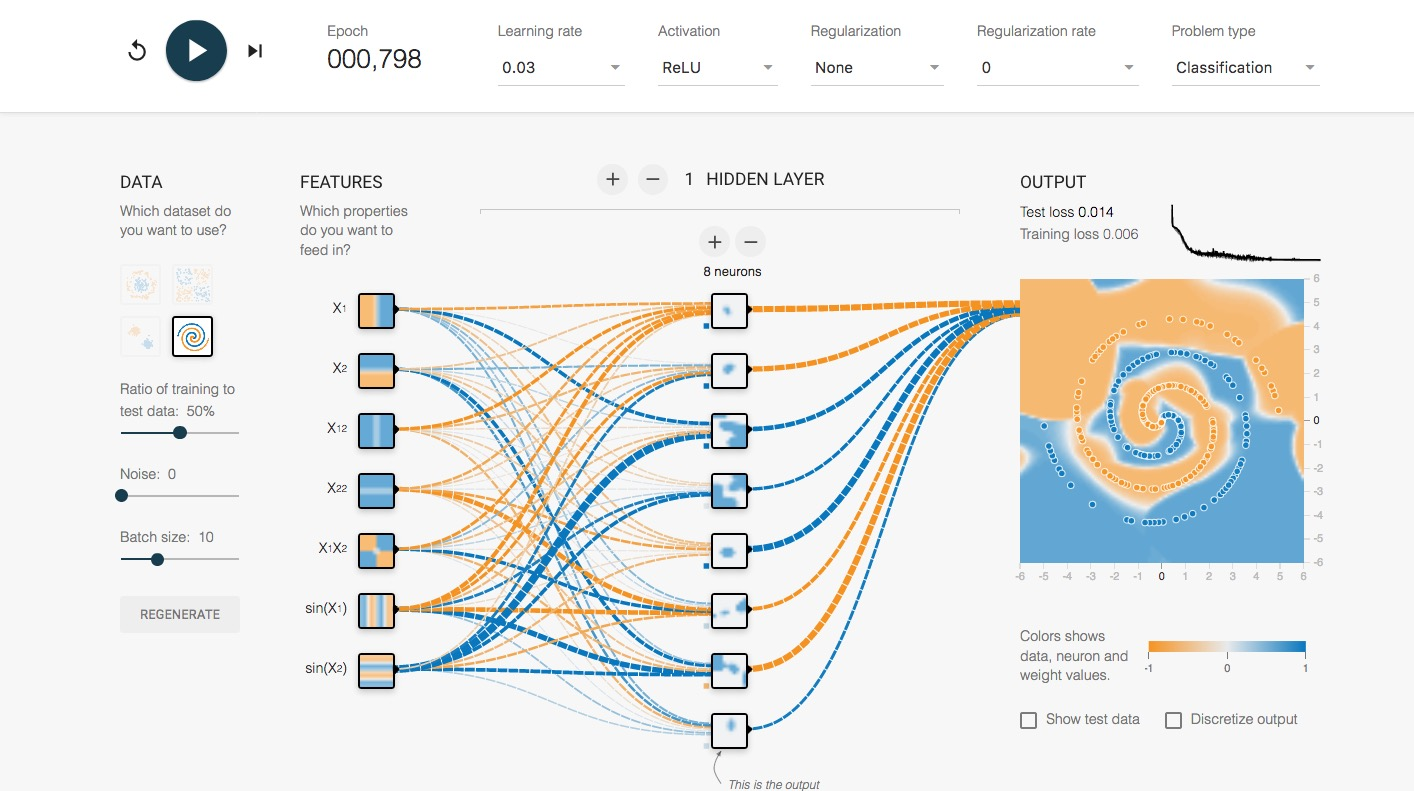

In [44]:
print 'With all 7 imput, the best result I got is:'
Image(filename='Bbest7.png',width=1000,height=600)

With 0.03 learning rate and ReLu activation function, only 1 hidden layer with 8 hidden unit, I can get this result of about 0.006 and 0.014 train and test loss. Actually, for those 7 input, we only need 2 of the x1 and x2 then the neural net can generate the rest actually so once we have all 7 input we can use some simplier setting and only use 1 hidden layer with 8 hidden units.

# Question 3: Multi-layer Perceptron Regressor (15 points)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python. We will use the Appliances energy prediction dataset for this problem https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 42** and **test_size = 0.33**.
Make sure you have 56 variables and one target variable.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

from sklearn import datasets

data = pd.read_csv('./energydata_complete.csv') 

y = data['Appliances']
X = data.drop(['date','Appliances', 'rv1', 'rv2'], axis = 1)


from dateutil import parser
timeData = np.array(data['date'])

days = []
hours = []
for line in xrange(len(timeData)):
    day = parser.parse(timeData[line]).weekday()
    hour = parser.parse(timeData[line]).hour
    days.append(day)
    hours.append(hour)
    
X = pd.concat([X, pd.get_dummies(days), pd.get_dummies(hours)], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((13222, 56), (13222,), (6513, 56), (6513,))


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.

Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. 

1) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, learning_rate_init = 0.005
    
Now, consider three different settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* (b) *hidden_layer_sizes = (30,10)* (c) *hidden_layer_sizes = (100,)*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (a), (b), and (c) (5pts)
      
2) Now, using the same number of hidden units used in part 1), train MLPRegressor models on whole training data and report RMSE score for both Train and Test set (Again, use StandardScaler). Which model works the best, (a), (b), or (c)? Briefly analyze the result in terms of the number of hidden units. (3pts)

3) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves for model (a), (b), and (c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* value. (2pts)

4) Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=5000, hidden_layer_sizes = (15,)
    
Now, consider three different settings for the learning rates:
    
   (i) *learning_rate_init = 0.005* (ii) *learning_rate_init = 0.01* (iii) *learning_rate_init = 1*
    
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model: (i), (ii), and (iii) (5pts)




In [11]:
# Centralize and scaling those data
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_test = Scaler.transform(X_test)
X_test = DataFrame(X_test)

## 1) 5-fold cross validation

In [12]:
# Define the three settings

## hidden_layer_sizes = (2,)
mlp2 = MLPRegressor(hidden_layer_sizes=(2,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42, 
                   batch_size=5000, learning_rate_init=0.005)

## hidden_layer_sizes = (30,10)
mlp30x10 = MLPRegressor(hidden_layer_sizes=(30,10), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.005)

## hidden_layer_sizes = (100,)
mlp100 = MLPRegressor(hidden_layer_sizes=(100,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.005)

In [13]:
from sklearn.metrics import mean_squared_error as MSE
kf = KFold(n_splits=5, random_state=42)
kf.get_n_splits(X_train)
RMSE2 = []
RMSE30x10 = []
RMSE100 = []
for train, test in kf.split(X_train):
    
    # fit these three models
    mlp2.fit(X_train.iloc[train], y_train.iloc[train])
    mlp30x10.fit(X_train.iloc[train], y_train.iloc[train])
    mlp100.fit(X_train.iloc[train], y_train.iloc[train])
    
    #generate the prediction
    mlp2_pred = mlp2.predict(X_train.iloc[test])
    mlp30x10_pred = mlp30x10.predict(X_train.iloc[test])
    mlp100_pred = mlp100.predict(X_train.iloc[test])
    
    y_true = y_train.iloc[test]
    
    #calculate the MSE
    Mse2 = MSE(y_true, mlp2_pred)
    Mse30x10 = MSE(y_true, mlp30x10_pred)
    Mse100 = MSE(y_true, mlp100_pred)
    
    
    RMSE2.append(Mse2**0.5)
    RMSE30x10.append(Mse30x10**0.5)
    RMSE100.append(Mse100**0.5)

print 'Here is the result for three models with 5-fold validation'
print 'RMSE for hidden layer size=(2,)is ',np.mean(RMSE2)
print 'RMSE for hidden layer size=(30,10)is ',np.mean(RMSE30x10)
print 'RMSE for hidden layer size=(100,)is ',np.mean(RMSE100)

Here is the result for three models with 5-fold validation
RMSE for hidden layer size=(2,)is  94.9362385743
RMSE for hidden layer size=(30,10)is  102.586729639
RMSE for hidden layer size=(100,)is  81.6606039886


**Findings**<br>
We can see that in the 5-fold validation setting, here the hidden layer size of (100,)performed the best and the complex network (30,10) did the worst.

## 2) Train MLPRegressor models on whole training data

In [14]:
# fit these three models
mlp2.fit(X_train, y_train)
mlp30x10.fit(X_train, y_train)
mlp100.fit(X_train, y_train)

#predict the result
mlp2_pred_train = mlp2.predict(X_train)
mlp2_pred_test = mlp2.predict(X_test)

mlp30x10_pred_train = mlp30x10.predict(X_train)
mlp30x10_pred_test = mlp30x10.predict(X_test)

mlp100_pred_train = mlp100.predict(X_train)
mlp100_pred_test = mlp100.predict(X_test)


#calculate the RMSEs

rmse2_train = MSE(y_train, mlp2_pred_train)**.5
rmse2_test = MSE(y_test, mlp2_pred_test)**.5

rmse30x10_train = MSE(y_train, mlp30x10_pred_train)**.5
rmse30x10_test = MSE(y_test, mlp30x10_pred_test)**.5

rmse100_train = MSE(y_train, mlp100_pred_train)**.5
rmse100_test = MSE(y_test, mlp100_pred_test)**.5

#print the results
print 'For model with hidden layer size (2,), train RMSE= ',rmse2_train,' test RMSE= ', rmse2_test
print 'For model with hidden layer size (30,10), train RMSE= ',rmse30x10_train,' test RMSE= ', rmse30x10_test
print 'For model with hidden layer size (100,), train RMSE= ',rmse100_train,' test RMSE= ', rmse100_test

For model with hidden layer size (2,), train RMSE=  92.4398639674  test RMSE=  93.1462304597
For model with hidden layer size (30,10), train RMSE=  78.7766484402  test RMSE=  84.6817190796
For model with hidden layer size (100,), train RMSE=  67.7820561419  test RMSE=  80.5835014268


 **Explainations**<br>
Unlike what we saw in the 5-fold validation. Here the  (30,10) did better than the simpliest one with (2,) hidden layer size. Complex neural network just need more training data so if we are doing it with 5-fold validaton, each time the number of training data is just inadequate so the model performed not well. Once we use the whole data as the training set, it performed better.

## 3）Plot the loss curve

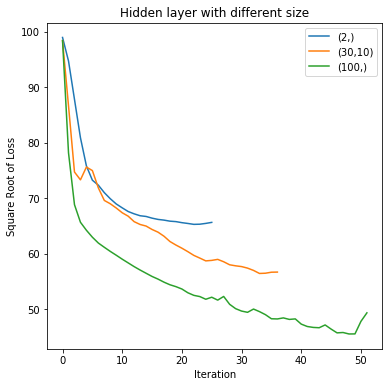

In [61]:
figure(figsize = (6,6))

plot(np.sqrt(mlp2.loss_curve_), label='(2,)')
plot(np.sqrt(mlp30x10.loss_curve_),label='(30,10)')
plot(np.sqrt(mlp100.loss_curve_), label='(100,)')
title('Hidden layer with different size')
xlabel('Iteration')
ylabel('Square Root of Loss')
plt.legend()



## 4) Different settings for the learning rates

In [16]:
# Define those three models with different initial learning rate
mlp0005 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.005)
mlp001 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=0.01)
mlp1 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='sgd', learning_rate='constant', random_state=42,
                    batch_size=5000, learning_rate_init=1)

RMSE0005=[]
RMSE001=[]
RMSE1=[]
for train, test in kf.split(X_train):
    
    # fit these three models
    mlp0005.fit(X_train.iloc[train], y_train.iloc[train])
    mlp001.fit(X_train.iloc[train], y_train.iloc[train])
    mlp1.fit(X_train.iloc[train], y_train.iloc[train])
    
    #generate the prediction
    mlp0005_pred = mlp0005.predict(X_train.iloc[test])
    mlp001_pred = mlp001.predict(X_train.iloc[test])
    mlp1_pred = mlp1.predict(X_train.iloc[test])
    
    y_true = y_train.iloc[test]
    
    #calculate the MSE
    Mse0005 = MSE(y_true, mlp0005_pred)
    Mse001 = MSE(y_true, mlp001_pred)
    Mse1 = MSE(y_true, mlp1_pred)
    
    
    RMSE0005.append(Mse0005**0.5)
    RMSE001.append(Mse001**0.5)
    RMSE1.append(Mse1**0.5)

print 'Here is the result for three models with 5-fold validation'
print 'RMSE for learning rate of 0.005 is ',np.mean(RMSE0005)
print 'RMSE for learning rate of 0.01 is ',np.mean(RMSE001)
print 'RMSE for learning rate of 1 is ',np.mean(RMSE1)

Here is the result for three models with 5-fold validation
RMSE for learning rate of 0.005 is  88.3324646365
RMSE for learning rate of 0.01 is  90.3531300757
RMSE for learning rate of 1 is  66247441756.3


# Question 4: (2+5+3=10 pts) Bayes Decision Theory
a. Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.
( 2 points )

b. Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the customer does not buy a TV and 1 if they do. For each customer, you are given two features, $x_1$ is the per hour salary and $x_2$ is the age. Assume that the class conditional distribution $p([x_1 , x_2]|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 15 and 30 respectively and that of those who don’t is 8.5 and 25. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 3 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem. (5 points)

c. Now write code to sample 100 customers from each class (C = 0, 1) under the assumed distribution and the estimated parameters and plot their features. Additionally, plot the decision boundary you obtained in the part (b) on the same plot. (3 points)

## ANSWER

## Part A


I think class-conditional likelihood of a class given an input is probability of a feature such as X_1 given that this feature belongs to a specific class C1, mathematically denoted by $p(x_1|C1)$. In addition, class prior in this case refers to $P(C1)$, which means the probability of getting class C1 when we are given a data point. Then, posterior probability stands for $P(C1|X_1)$, which means probability of it belongs to class C1 given it has feature X_1. The relationship between these three can be expressed by $P(C1|X_1) = \cfrac{P(X_1|C1)*P(C_1)}{P(X_1)}$. So, if we keep class prior constant, as class-conditional likelihood of a given class increases, the posterior probability also increases and they are positively related to each other. On the other hand, if we keep the class-conditional likelihood constant, as class prior increases, the posterior probability decreases and they are negatively related to each other.

## Part B

In this question, we will be using discriminant function to find the optimal Bayes decision boundary and the formula for it is denoted as  $g_i(x)=ln$

## Part C

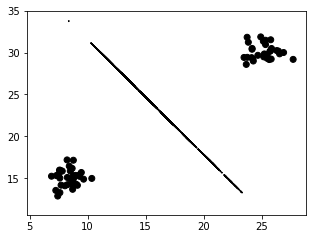

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
mu1 = [8.5, 25]
cov1 = np.eye(2)

mu2 = [15, 30]
cov2 = np.eye(2)

X1 = np.random.multivariate_normal(mu1, cov1, 100)
X2 = np.random.multivariate_normal(mu2, cov2, 100)
y = np.zeros(200)
y[133:] = 1


z=13*X1 + 10*X2 -429.136
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.scatter(X1,X2, c=y, cmap=plt.cm.binary, zorder=2)

ax.contour(33-0.729*X2, X2, z, colors='k')
plt.show()

# Question 5: Decision Tree using Python (10 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use all the data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?

In [21]:
import pandas as pd
data_q5 = pd.read_csv('BreastTissue.csv')
X = data_q5.ix[:,2:11]
y = data_q5.ix[:,1:2]
# transforam categorical y values into numerical value to process decision tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.values)
list(le.classes_)
data_q5['target']=list(le.transform(y.values)) 

## Using Gini

In [23]:
from sklearn import tree
import graphviz 
clf_gini = tree.DecisionTreeClassifier(criterion="gini",max_depth=2)
clf_gini = clf_gini.fit(X,data_q5.target)
from sklearn import tree
from sklearn.externals.six import StringIO
with open("decision_tree_gini.dot", 'w') as f:
    f = tree.export_graphviz(clf_gini, out_file=f)

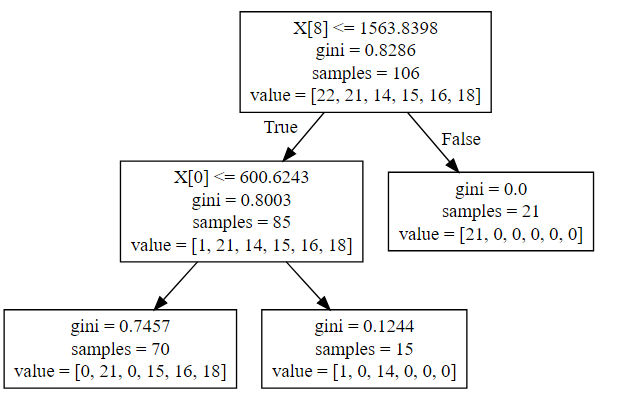

In [46]:
Image(filename='gini.png')

## Using Entropy

In [24]:
from sklearn import tree
import graphviz
from sklearn.externals.six import StringIO
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf_entropy = clf_entropy.fit(X,data_q5.target)
with open("decision_tree_entropy.dot", 'w') as f:
    f = tree.export_graphviz(clf_entropy, out_file=f)

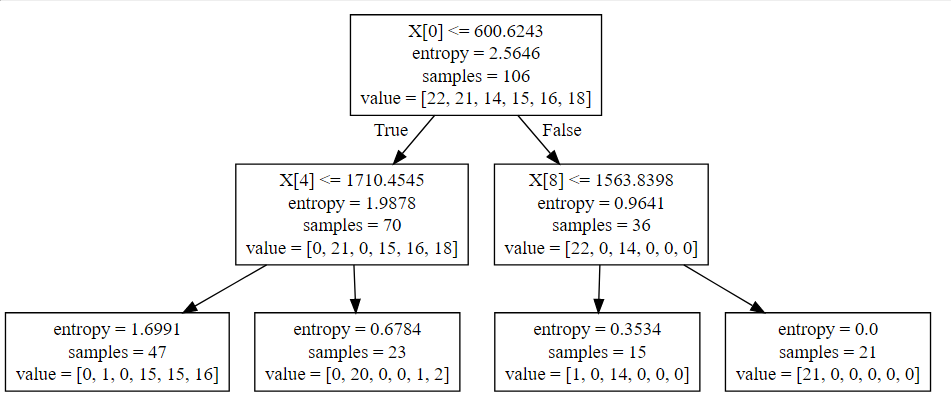

In [47]:
Image(filename='entropy.png')